# Una ardilla coruñesa quiere ir a Almería, sin tocar el suelo




<img src="camino.jpg"> 

Hace muchos años, pero que muchos muchos... se decía que en España había tantos árboles que una ardillla podría ir de norte a sur sin tocar el suelo....



<img src="Salto.png"> 

.
.
.
.







Pero muchos dicen que en España como hay cada vez menos árboles mejor que la ardilla vaya aprendiendo a volar.....


....




<img src="volar.jpg">

Es eso cierto? La pobre ardilla debe coger transporte público para llegar a su destino? 
digo... hay cada vez menos árboles? Cada vez hay más desierto en España?
Deberá la ardilla tomar un Camello-bus?


Para poder responder esta pregunta lo que vamos a ver es si es cierto que cada vez hay menos árboles en España, y para
ello vamos a utilizar los datos del IFN de España: Inventario Forestal Nacional.

Que es el IFN Español? Cada 10 años en España se hace un estudio del territorio español estudiando su tipo de uso (forestal, agricultura, etcc...) y contabilizando la superficie arbolada, número de arboles etc...

Al ser un estudio que se repite cada 10 años en todo el territorio nacional y como llevan varios decenios haciéndose podemos estudiar la evolución de la cobertura vegetal en ESpaña.

Para obtener los datos del IFN vamos a la siguiente pagina:

http://www.magrama.gob.es/es/biodiversidad/servicios/banco-datos-naturaleza/informacion-disponible/tablas_resumen_IFN3.aspx

Y nos vamos a bajar el resumen de los datos de los diferente IFN para todas las provincias. 

Los conceptos son:

http://www.mapama.gob.es/es/biodiversidad/servicios/banco-datos-naturaleza/documentador_bdcampo_ifn3_tcm7-217971.pdf

In [1]:
# Tratamos el Excel (quitando fusiones de celdas, columnas sobrantes, quitamos simbolos no unicode,porque tenemos un python 2.7,
# además le añadimos las columans de longituud y latitud para un análisis posterior, etc..) y lo guardamos como un CSV
# Nuestro Excel ya tratado se llamará IFN y esta incluido en el zip failitado.

In [2]:
# Lo primero: importamos las librerias que vamos a necesitar y otras más "porsiaca"
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt 
%matplotlib inline
%pylab
import math
import datetime
import numpy as np
import matplotlib.colors as colors
import matplotlib.finance as finance
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import matplotlib.mlab as mlab
import matplotlib.font_manager as font_manager
import json
import matplotlib.pyplot as plt 
from descartes import PolygonPatch
import json
import numpy
import pylab
import mpl_toolkits.mplot3d.axes3d as p3
import re
import sys
import folium
import os
from folium.plugins import HeatMap
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from pylab import rcParams
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
import numpy as np           
from scipy.io import netcdf


Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


### import trees

### import chipmunk from trees


Out [import]:
<img src="Chipmunk.PNG">

In [3]:
# Ahora que tenemos todo, ardilla incluida, cargarmos en un dataframe los datos del resumen del inventario forestal nacional

IFN = pd.read_csv('IFN.csv', sep=',', encoding='latin-1')


In [4]:
# En ventana de comando python -V o mediante la siguiente sentencia vamos a ver que versiónn de python tenemos
print (sys.version)

2.7.12 |Anaconda 4.0.0 (64-bit)| (default, Jun 29 2016, 11:07:13) [MSC v.1500 64 bit (AMD64)]


In [5]:
# comprobamos la carga
IFN.head()

,IFN,Provincia,comunidad_autonoma,longitud,Latitud,Ano_inventario,Bosque_no_adehesado,Bosque_adehesado,Monte_arbolado_ralo,Total_monte_arbolado,Monte_desarbolado,Total_uso_forestal,Total_uso_no_forestal,Total_provincial,Biomasa_arborea,Cantidad_pies_mayores,Cantidad_pies_menores,Cantidad_pies_mayoresxHa,Cantidad_pies_menoresxHa,Biomasa_arboreaxHa
0,IFN4,A Coruna,Galicia,43.433600,-8.257084,2009.0,409917.0,NaN,5464.0,415381.0,86205.0,50586.0,293452.0,795038.0,64125320.0,290578320.0,293420177.0,700.0,706.0,154.38
1,IFN3,A Coruna,Galicia,43.433600,-8.257084,1997.0,371475.0,0.0,29714.0,401189.0,104417.0,505606.0,289432.0,795038.0,40804528.0,197617033.0,281358378.0,493.0,701.0,101.71
2,IFN2,A Coruna,Galicia,43.433600,-8.257084,1986.0,311173.0,0.0,32990.0,344163.0,141315.0,485478.0,309669.0,795147.0,33117239.0,151596632.0,147628150.0,440.0,429.0,96.23
3,IFN1,A Coruna,Galicia,43.433600,-8.257084,1973.0,NaN,NaN,NaN,355774.0,164776.0,520550.0,267050.0,787600.0,25643030.0,229555278.0,139089061.0,645.0,391.0,72.08
4,IFN4,Pontevedra,Galicia,42.422415,-8.619254,2009.0,206969.0,NaN,3234.0,210203.0,86785.0,296988.0,152463.0,449451.0,33047793.0,121018923.0,143249825.0,576.0,681.0,157.22


In [6]:
# vemos un resumen de la información
print (IFN.shape)
IFN.info()

(156, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 20 columns):
IFN                         156 non-null object
Provincia                   156 non-null object
comunidad_autonoma          156 non-null object
longitud                    156 non-null float64
Latitud                     156 non-null float64
Ano_inventario              155 non-null float64
Bosque_no_adehesado         105 non-null float64
Bosque_adehesado            126 non-null float64
Monte_arbolado_ralo         105 non-null float64
Total_monte_arbolado        155 non-null float64
Monte_desarbolado           155 non-null float64
Total_uso_forestal          155 non-null float64
Total_uso_no_forestal       155 non-null float64
Total_provincial            155 non-null float64
Biomasa_arborea             155 non-null float64
Cantidad_pies_mayores       155 non-null float64
Cantidad_pies_menores       155 non-null float64
Cantidad_pies_mayoresxHa    155 non-null float64
Cantid

In [7]:
# Se nos ha cargado correctamente (cifras con floar64 y descriptivos como objects)

In [8]:
# vamos a quitar los datos de los IFN4 ya que solo 5 provincias tienen linea para dicho IFN y ademas los datos no estan
# completos en dos de ellas.

# Para ello me creo un nuevo data frame con solo datos de IFN1, IFN2 e IFN3

IFN123 = IFN[(IFN.IFN ==  'IFN1') | (IFN.IFN ==  'IFN2') | (IFN.IFN ==  'IFN3')]

In [9]:
IFN123.head()

,IFN,Provincia,comunidad_autonoma,longitud,Latitud,Ano_inventario,Bosque_no_adehesado,Bosque_adehesado,Monte_arbolado_ralo,Total_monte_arbolado,Monte_desarbolado,Total_uso_forestal,Total_uso_no_forestal,Total_provincial,Biomasa_arborea,Cantidad_pies_mayores,Cantidad_pies_menores,Cantidad_pies_mayoresxHa,Cantidad_pies_menoresxHa,Biomasa_arboreaxHa
1,IFN3,A Coruna,Galicia,43.433600,-8.257084,1997.0,371475.0,0.0,29714.0,401189.0,104417.0,505606.0,289432.0,795038.0,40804528.0,197617033.0,281358378.0,493.0,701.0,101.71
2,IFN2,A Coruna,Galicia,43.433600,-8.257084,1986.0,311173.0,0.0,32990.0,344163.0,141315.0,485478.0,309669.0,795147.0,33117239.0,151596632.0,147628150.0,440.0,429.0,96.23
3,IFN1,A Coruna,Galicia,43.433600,-8.257084,1973.0,NaN,NaN,NaN,355774.0,164776.0,520550.0,267050.0,787600.0,25643030.0,229555278.0,139089061.0,645.0,391.0,72.08
5,IFN3,Pontevedra,Galicia,42.422415,-8.619254,1998.0,199557.0,0.0,21260.0,220817.0,81428.0,302245.0,147206.0,449451.0,23435638.0,99880832.0,158297562.0,452.0,717.0,106.13
6,IFN2,Pontevedra,Galicia,42.422415,-8.619254,1987.0,115747.0,0.0,18641.0,134388.0,150311.0,284699.0,164752.0,449451.0,14576046.0,58596645.0,50957422.0,436.0,379.0,108.46


In [10]:
# comprobamos que la seleccion se ha hecho correctamente
print ('IFN', np.unique(IFN123[['IFN']]))

('IFN', array([u'IFN1', u'IFN2', u'IFN3'], dtype=object))


In [11]:
# Como hay datos del IFN que no están y se han cambiado por NAN vamos a sustituirlos por 0 para poder hacer el análisis

IFN123 = IFN123.fillna(0)

In [12]:
IFN123.head()

,IFN,Provincia,comunidad_autonoma,longitud,Latitud,Ano_inventario,Bosque_no_adehesado,Bosque_adehesado,Monte_arbolado_ralo,Total_monte_arbolado,Monte_desarbolado,Total_uso_forestal,Total_uso_no_forestal,Total_provincial,Biomasa_arborea,Cantidad_pies_mayores,Cantidad_pies_menores,Cantidad_pies_mayoresxHa,Cantidad_pies_menoresxHa,Biomasa_arboreaxHa
1,IFN3,A Coruna,Galicia,43.433600,-8.257084,1997.0,371475.0,0.0,29714.0,401189.0,104417.0,505606.0,289432.0,795038.0,40804528.0,197617033.0,281358378.0,493.0,701.0,101.71
2,IFN2,A Coruna,Galicia,43.433600,-8.257084,1986.0,311173.0,0.0,32990.0,344163.0,141315.0,485478.0,309669.0,795147.0,33117239.0,151596632.0,147628150.0,440.0,429.0,96.23
3,IFN1,A Coruna,Galicia,43.433600,-8.257084,1973.0,0.0,0.0,0.0,355774.0,164776.0,520550.0,267050.0,787600.0,25643030.0,229555278.0,139089061.0,645.0,391.0,72.08
5,IFN3,Pontevedra,Galicia,42.422415,-8.619254,1998.0,199557.0,0.0,21260.0,220817.0,81428.0,302245.0,147206.0,449451.0,23435638.0,99880832.0,158297562.0,452.0,717.0,106.13
6,IFN2,Pontevedra,Galicia,42.422415,-8.619254,1987.0,115747.0,0.0,18641.0,134388.0,150311.0,284699.0,164752.0,449451.0,14576046.0,58596645.0,50957422.0,436.0,379.0,108.46


In [13]:
# comprobamos de nuevo el data frame y veremos que esta correcto
IFN123.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 155
Data columns (total 20 columns):
IFN                         150 non-null object
Provincia                   150 non-null object
comunidad_autonoma          150 non-null object
longitud                    150 non-null float64
Latitud                     150 non-null float64
Ano_inventario              150 non-null float64
Bosque_no_adehesado         150 non-null float64
Bosque_adehesado            150 non-null float64
Monte_arbolado_ralo         150 non-null float64
Total_monte_arbolado        150 non-null float64
Monte_desarbolado           150 non-null float64
Total_uso_forestal          150 non-null float64
Total_uso_no_forestal       150 non-null float64
Total_provincial            150 non-null float64
Biomasa_arborea             150 non-null float64
Cantidad_pies_mayores       150 non-null float64
Cantidad_pies_menores       150 non-null float64
Cantidad_pies_mayoresxHa    150 non-null float64
Cantidad_pies_me

In [14]:
# A partir de ahora lo vamos a hacer es ver el desarrollo que se ha dado desde el primer inventario forestal hasta el ultimo en
# España. Por ello primero lo vamos a estudiar a nivel de comunidad autonoma.

In [15]:
# para ello empezamos por agrupar los datos a nivel de comunidad autonoma. Y ver que evolucion han tendio desde el primmer IFN 
# hasta el último:

# Agrupamos a nivel de communidad autonoma y número de inventario así tendremos los valores acumulados de cada columna sumarizados en
# base a comunidad autonoma y número de inventario, que son los datos que nos interesan. El año no nos interaesa, ya que queremos
# comparar en base a número de inventario.

Group_comunidad=IFN123.groupby(['comunidad_autonoma','IFN']).sum()

In [16]:
Group_comunidad.head()

longitud    Latitud  Ano_inventario  \
comunidad_autonoma IFN                                           
Andalucia          IFN1  297.577987 -38.265603         15740.0   
                   IFN2  297.577987 -38.265603         15963.0   
                   IFN3  297.577987 -38.265603         16055.0   
Aragon             IFN1  124.133883  -2.390806          5908.0   
                   IFN2  124.133883  -2.390806          5981.0   

                         Bosque_no_adehesado  Bosque_adehesado  \
comunidad_autonoma IFN                                           
Andalucia          IFN1                  0.0          572890.0   
                   IFN2            1451535.0          681379.0   
                   IFN3            2046436.0          665245.0   
Aragon             IFN1                  0.0               0.0   
                   IFN2             992787.0               0.0   

                         Monte_arbolado_ralo  Total_monte_arbolado  \
comunidad_autonoma IFN                                               
Andalucia          IFN1                  0.0             1821913.0   
                   IFN2             278719.0             2411632.0   
                   IFN3             257397.0             2969079.0   
Aragon             IFN1                  0.0              949996.0   
                   IFN2             192743.0             1185532.0   

                         Monte_desarbolado  Total_uso_forestal  \
comunidad_autonoma IFN                                           
Andalucia          IFN1          2509271.0           4331184.0   
                   IFN2          1913747.0           4325378.0   
                   IFN3          1422720.0           4391800.0   
Aragon             IFN1          1556048.0           2506044.0   
                   IFN2          1293230.0           2478762.0   

                         Total_uso_no_forestal  Total_provincial  \
comunidad_autonoma IFN                                             
Andalucia          IFN1              4395616.0         8726800.0   
                   IFN2              4434589.0         8759969.0   
                   IFN3              4367791.0         8759590.0   
Aragon             IFN1              2260756.0         4766800.0   
                   IFN2              2293265.0         4772027.0   

                         Biomasa_arborea  Cantidad_pies_mayores  \
comunidad_autonoma IFN                                            
Andalucia          IFN1       30252243.0            223304349.0   
                   IFN2       40794501.0            402855610.0   
                   IFN3       74970838.0            657441659.0   
Aragon             IFN1       32546079.0            245982297.0   
                   IFN2       44622752.0            489989636.0   

                         Cantidad_pies_menores  Cantidad_pies_mayoresxHa  \
comunidad_autonoma IFN                                                     
Andalucia          IFN1            222049148.0                     960.0   
                   IFN2            513480154.0                    1567.0   
                   IFN3            767908378.0                    1878.0   
Aragon             IFN1            354262544.0                     745.0   
                   IFN2            932766260.0                    1217.0   

                         Cantidad_pies_menoresxHa  Biomasa_arboreaxHa  
comunidad_autonoma IFN                                                 
Andalucia          IFN1                    1059.0              133.05  
                   IFN2                    1936.0              154.55  
                   IFN3                    2202.0              207.67  
Aragon             IFN1                    1113.0               92.35  
                   IFN2                    2387.0              105.54

(<matplotlib.axes._subplots.AxesSubplot at 0xab55f28>,
 None,
 <matplotlib.legend.Legend at 0xaa81eb8>)

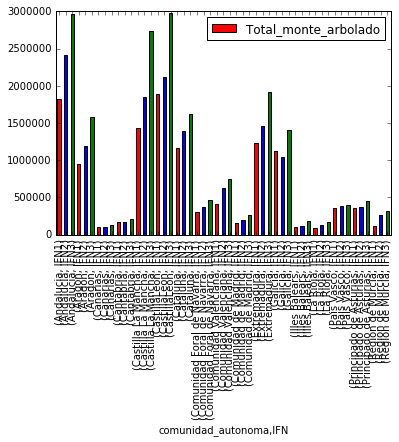

In [17]:
# en Rojo los datos de la cantidad de hectareas de monte arbolado en el primer IFN, enn azul del segundo IFN y en verde el del
# último IFN, que es el IFN 3

%matplotlib inline
Group_comunidad.Total_monte_arbolado.plot(kind="bar", color=['r','b','g']),figsize(45,20), legend(loc='best')

In [18]:
# Vemos que en todas las provincias la barra corresppondiente al IFN3 es la de mayor tambaño. Es decir que cada vez ha más arboles
# ahora vamos a hacer el mismo análisis pero a nivel de provinncia

In [19]:
# volvemos a agrupar, esta vez a nivel de provincia y número de inventario. Asi veremos todos los valores por provincia y número
# de inventario

Group_Provincia=IFN123.groupby(['Provincia','IFN']).sum()

In [20]:
Group_Provincia.head()

longitud   Latitud  Ano_inventario  Bosque_no_adehesado  \
Provincia IFN                                                              
A Coruna  IFN1  43.433600 -8.257084          1973.0                  0.0   
          IFN2  43.433600 -8.257084          1986.0             311173.0   
          IFN3  43.433600 -8.257084          1997.0             371475.0   
Albacete  IFN1  38.973864 -1.853066          1967.0                  0.0   
          IFN2  38.973864 -1.853066          1993.0             223449.0   

                Bosque_adehesado  Monte_arbolado_ralo  Total_monte_arbolado  \
Provincia IFN                                                                 
A Coruna  IFN1               0.0                  0.0              355774.0   
          IFN2               0.0              32990.0              344163.0   
          IFN3               0.0              29714.0              401189.0   
Albacete  IFN1           13066.0                  0.0              264025.0   
          IFN2               0.0             121790.0              345239.0   

                Monte_desarbolado  Total_uso_forestal  Total_uso_no_forestal  \
Provincia IFN                                                                  
A Coruna  IFN1           164776.0            520550.0               267050.0   
          IFN2           141315.0            485478.0               309669.0   
          IFN3           104417.0            505606.0               289432.0   
Albacete  IFN1           294852.0            558877.0               926923.0   
          IFN2           283879.0            629118.0               863328.0   

                Total_provincial  Biomasa_arborea  Cantidad_pies_mayores  \
Provincia IFN                                                              
A Coruna  IFN1          787600.0       25643030.0            229555278.0   
          IFN2          795147.0       33117239.0            151596632.0   
          IFN3          795038.0       40804528.0            197617033.0   
Albacete  IFN1         1485800.0        4846439.0             43363133.0   
          IFN2         1492446.0        7743859.0             81832441.0   

                Cantidad_pies_menores  Cantidad_pies_mayoresxHa  \
Provincia IFN                                                     
A Coruna  IFN1            139089061.0                     645.0   
          IFN2            147628150.0                     440.0   
          IFN3            281358378.0                     493.0   
Albacete  IFN1             58096378.0                     164.0   
          IFN2            147221528.0                     237.0   

                Cantidad_pies_menoresxHa  Biomasa_arboreaxHa  
Provincia IFN                                                 
A Coruna  IFN1                     391.0               72.08  
          IFN2                     429.0               96.23  
          IFN3                     701.0              101.71  
Albacete  IFN1                     220.0               18.36  
          IFN2                     426.0               22.43

(<matplotlib.axes._subplots.AxesSubplot at 0xb0a7390>, None)

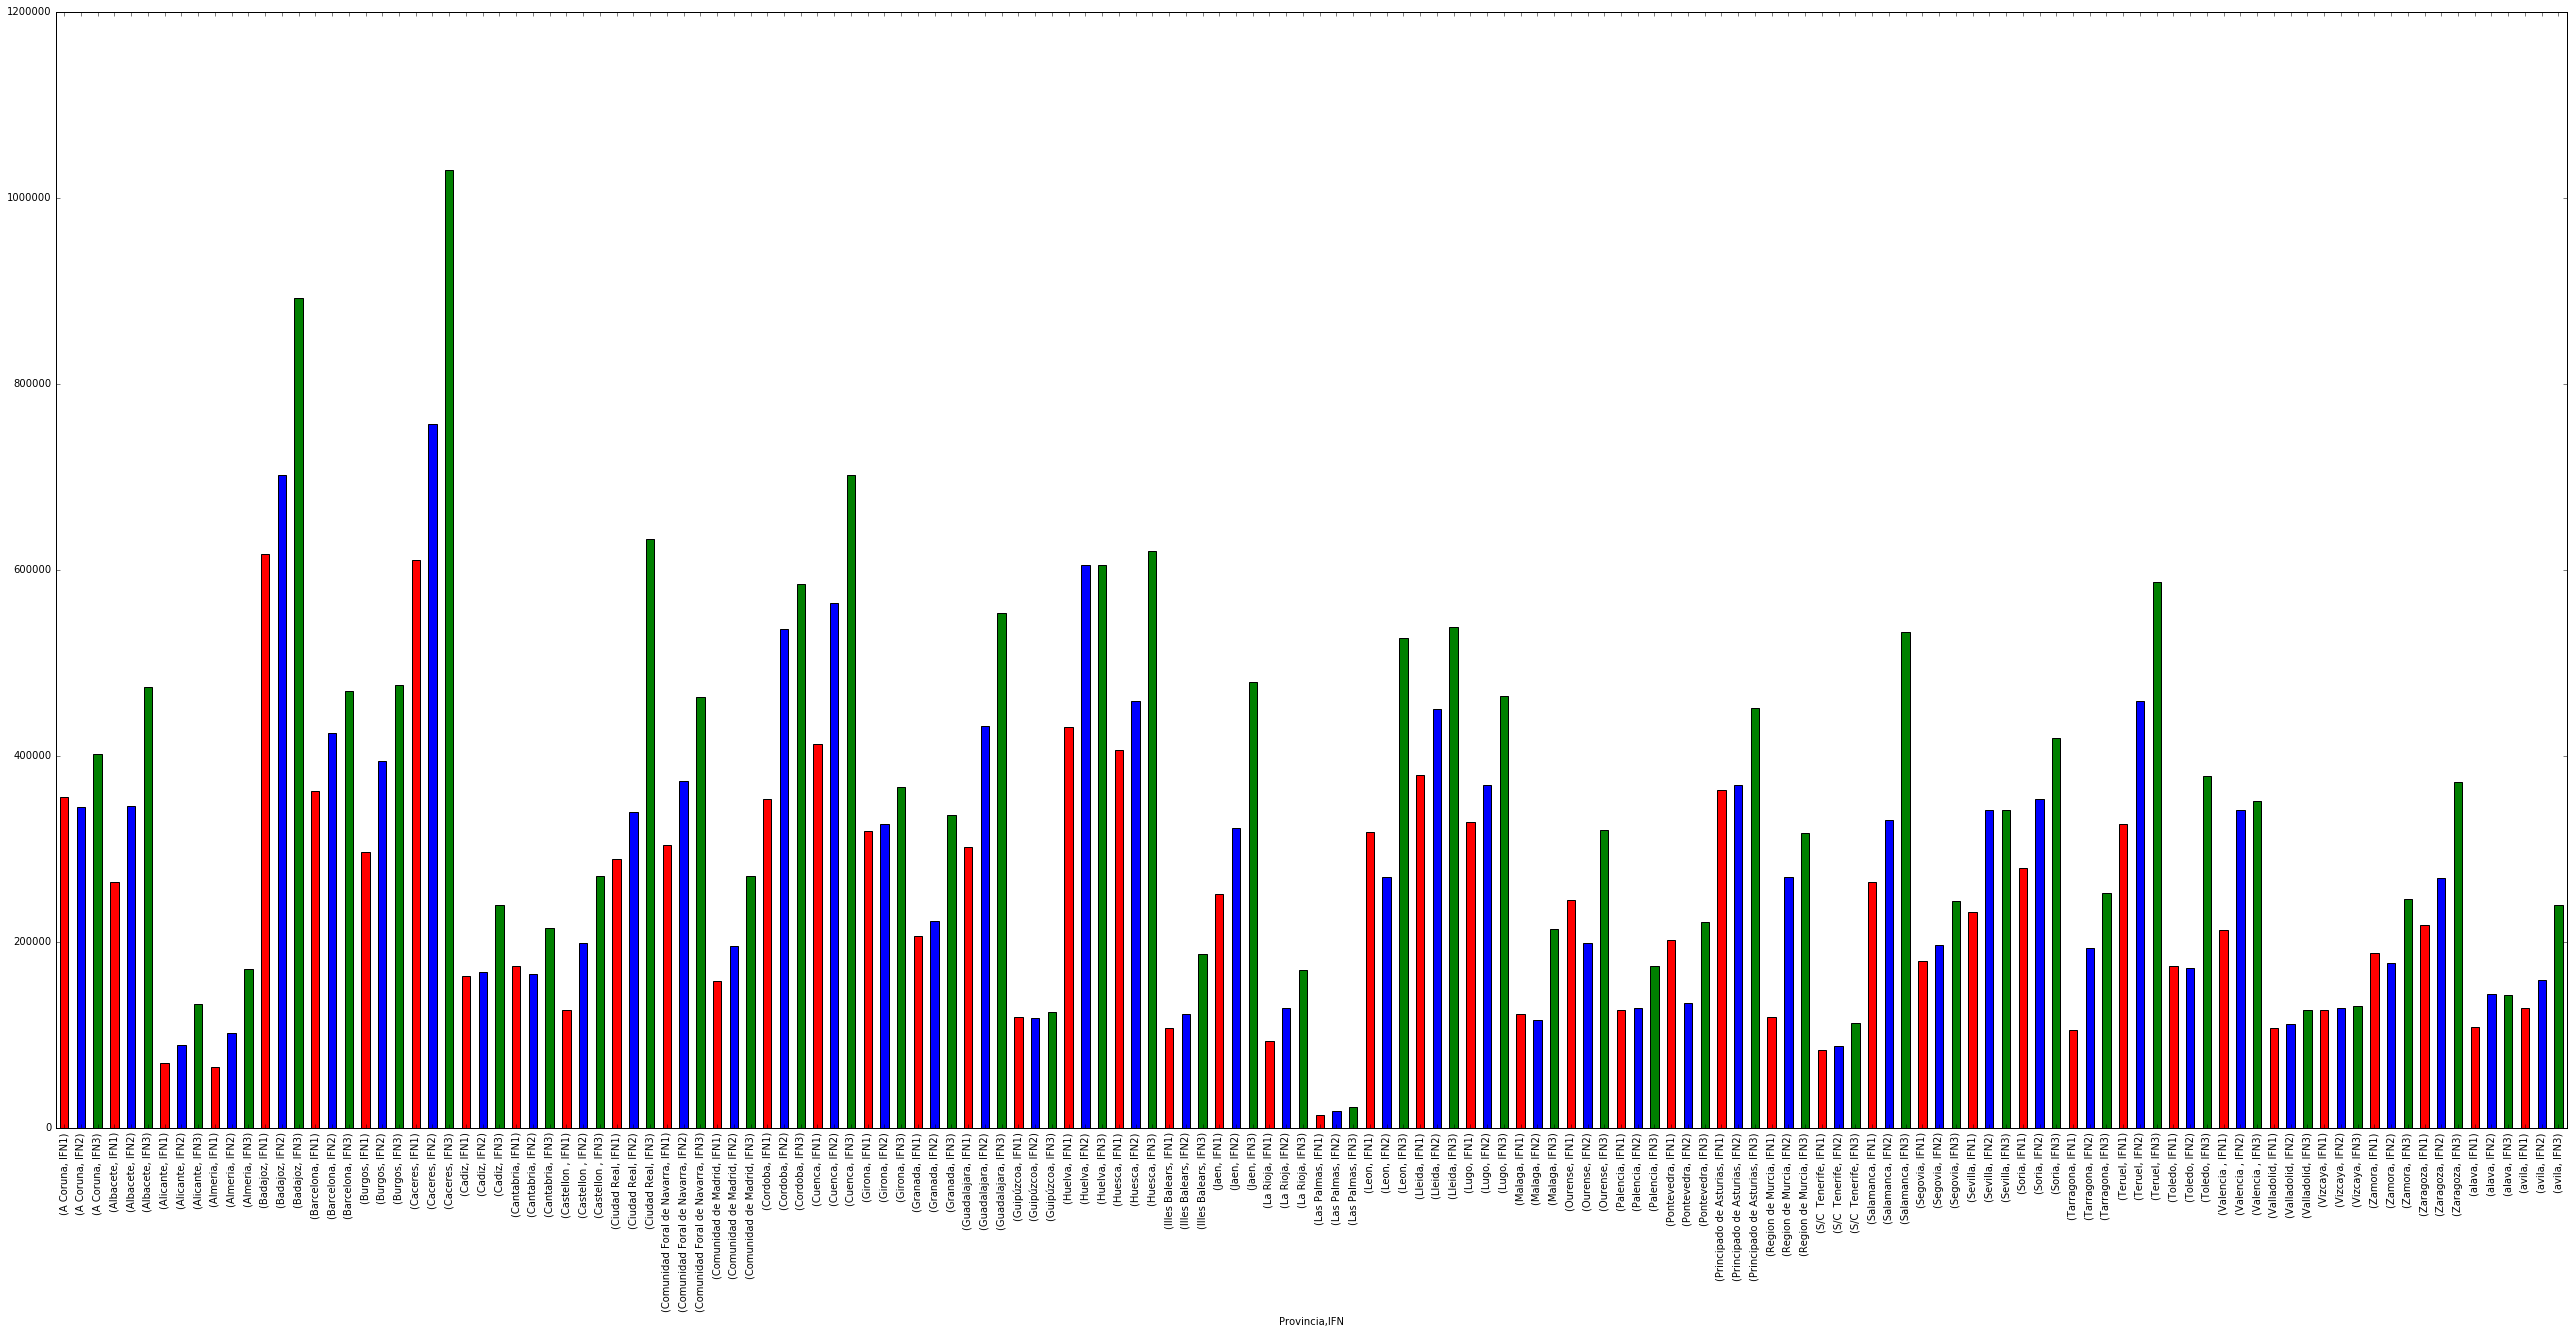

In [21]:
# Nuevamente en Rojo los datos de la cantidad de hectareas de monte arbolado en el primer IFN, enn azul del segundo IFN y en 
# verde el del último IFN, que es el IFN 3
Group_Provincia.Total_monte_arbolado.plot(kind="bar", color=['r','b','g']),figsize(10,5)

In [22]:
# Nuevamente nos sale que el IFN3 tiene mayor número de monte arbolado en todas las provincias respecto a inventarios previos

In [23]:
# Ahora vamos a comparar con heatmaps como estaba de total monte arbolado Espña cuando se hizo el recuento en IFN1 ,
#  después en el IFN 2 y finalmente en la actualidad con el IFN3.

# Esto nos permitirá ver la evolución.

In [24]:
# primero creamos los data frames de cada IFN

SpainIFN1 = IFN123[(IFN123.IFN ==  'IFN1')]
SpainIFN2 = IFN123[(IFN123.IFN ==  'IFN2')]
SpainIFN3 = IFN123[(IFN123.IFN ==  'IFN3')]


In [25]:
# Comprobamos el Daa frame del IFN 1

SpainIFN1.head()

,IFN,Provincia,comunidad_autonoma,longitud,Latitud,Ano_inventario,Bosque_no_adehesado,Bosque_adehesado,Monte_arbolado_ralo,Total_monte_arbolado,Monte_desarbolado,Total_uso_forestal,Total_uso_no_forestal,Total_provincial,Biomasa_arborea,Cantidad_pies_mayores,Cantidad_pies_menores,Cantidad_pies_mayoresxHa,Cantidad_pies_menoresxHa,Biomasa_arboreaxHa
3,IFN1,A Coruna,Galicia,43.433600,-8.257084,1973.0,0.0,0.0,0.0,355774.0,164776.0,520550.0,267050.0,787600.0,25643030.0,229555278.0,139089061.0,645.0,391.0,72.08
7,IFN1,Pontevedra,Galicia,42.422415,-8.619254,1972.0,0.0,0.0,0.0,201280.0,106592.0,307872.0,139828.0,447700.0,16976558.0,115946210.0,73060747.0,576.0,363.0,84.34
11,IFN1,Lugo,Galicia,43.002632,-7.499439,1972.0,0.0,0.0,0.0,328164.0,315917.0,644081.0,336219.0,980300.0,15455065.0,161233058.0,155608311.0,491.0,474.0,47.10
15,IFN1,Ourense,Galicia,42.350882,-7.902105,1974.0,0.0,0.0,0.0,244143.0,268385.0,512528.0,215172.0,727700.0,12724395.0,121380810.0,123375655.0,497.0,505.0,52.12
18,IFN1,Illes Balears,Illes Balears,39.569470,2.650017,1970.0,0.0,0.0,0.0,107371.0,69219.0,176590.0,324810.0,501400.0,3207980.0,34415704.0,39264867.0,321.0,366.0,29.88


In [26]:
# Vemos que tenemos los datos correctamente

SpainIFN1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 3 to 155
Data columns (total 20 columns):
IFN                         50 non-null object
Provincia                   50 non-null object
comunidad_autonoma          50 non-null object
longitud                    50 non-null float64
Latitud                     50 non-null float64
Ano_inventario              50 non-null float64
Bosque_no_adehesado         50 non-null float64
Bosque_adehesado            50 non-null float64
Monte_arbolado_ralo         50 non-null float64
Total_monte_arbolado        50 non-null float64
Monte_desarbolado           50 non-null float64
Total_uso_forestal          50 non-null float64
Total_uso_no_forestal       50 non-null float64
Total_provincial            50 non-null float64
Biomasa_arborea             50 non-null float64
Cantidad_pies_mayores       50 non-null float64
Cantidad_pies_menores       50 non-null float64
Cantidad_pies_mayoresxHa    50 non-null float64
Cantidad_pies_menoresxHa    50 non-

In [27]:
# Para el Heatmap seleccionamos las columnas 'longitud','Latitud' y'Total_monte_arboladoMapa'. Además para adecuar la escala
# del heatma dividimos el valor de la nueva columna Total_monte_arboladoMapa entre 130
# Y finalmente lo convertimos en una matriz

#data= [[41., -3., 5],[43.1, -2.7, 3000]]
#data
#df.as_matrix()
SpainIFN1['Total_monte_arboladoMapa'] = SpainIFN1['Total_monte_arbolado']/130
SpainIFN2['Total_monte_arboladoMapa'] = SpainIFN2['Total_monte_arbolado']/130
SpainIFN3['Total_monte_arboladoMapa'] = SpainIFN3['Total_monte_arbolado']/130
data1 = SpainIFN1.as_matrix([['longitud','Latitud','Total_monte_arboladoMapa']])
data2 = SpainIFN2.as_matrix([['longitud','Latitud','Total_monte_arboladoMapa']])
data3 = SpainIFN3.as_matrix([['longitud','Latitud','Total_monte_arboladoMapa']])



C:\Users\Asier\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Asier\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Asier\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing

In [28]:
# Utilizando el mapa de España le añadimos los datos de la matriz del IFN1

from folium.plugins import HeatMap

m = folium.Map([41., -3.], tiles='stamentoner', zoom_start=6)

HeatMap(data1).add_to(m)

m.save(os.path.join( 'Heatmap.html'))

m

In [29]:
# Repetimos la operación con los datos del IFN 2

In [30]:
from folium.plugins import HeatMap

m2 = folium.Map([41., -3.], tiles='stamentoner', zoom_start=6)

HeatMap(data2).add_to(m2)

m2.save(os.path.join( 'Heatmap.html'))

m2

In [31]:
# Y por último la misma operación con los datos del IFN 3

In [32]:
from folium.plugins import HeatMap

m3 = folium.Map([41., -3.], tiles='stamentoner', zoom_start=6)

HeatMap(data3).add_to(m3)

m3.save(os.path.join( 'Heatmap.html'))

m3

In [33]:
# Al comparar los tres mapas vemos nuevamente que efectivamente hay cambios significativos entre IFN1, IFN2, y el IFN3

In [34]:
# A nivel de España queda claro que en todas las provincias las barras y el heatmap corresppondiente al IFN3 muestra 
# valores mayores en el totaal Arbolado. Es decir que cada vez ha más arboles en España.


### Por donde pasaría la ardilla para ir de La coruña a Almeria?

Vale, sabemos que la ardilla quiere ir de La Coruña a Almeria. Bueno, entonces.... que ruta tomará?
Imaginamos que la ruta más corta

<img src="Ruta1.PNG"> 

Vale, esto nos quiere decir que que desde Galicia pasará a Castilla León, de ahí a castilla la Mancha y finalmente Andalucía.

Entonces no hace falta estudiar el crecimiento de los árboles en las islas Canarias y otros sitios por los que no pasa.

Por lo que vamos a ver un poco más en detalle esas cuatro counidades autónomas para ver como lo tendría la ardilla para ir de árbol en árbol...

In [35]:
# Empecemos a ver la evolución que ha tenido el monte arbolado en Galicia

In [36]:
# seleccionamos los datos de las provincias gallegas 

Galicia = IFN123[(IFN123.comunidad_autonoma ==  "Galicia")]

In [37]:
Galicia.head()

,IFN,Provincia,comunidad_autonoma,longitud,Latitud,Ano_inventario,Bosque_no_adehesado,Bosque_adehesado,Monte_arbolado_ralo,Total_monte_arbolado,Monte_desarbolado,Total_uso_forestal,Total_uso_no_forestal,Total_provincial,Biomasa_arborea,Cantidad_pies_mayores,Cantidad_pies_menores,Cantidad_pies_mayoresxHa,Cantidad_pies_menoresxHa,Biomasa_arboreaxHa
1,IFN3,A Coruna,Galicia,43.433600,-8.257084,1997.0,371475.0,0.0,29714.0,401189.0,104417.0,505606.0,289432.0,795038.0,40804528.0,197617033.0,281358378.0,493.0,701.0,101.71
2,IFN2,A Coruna,Galicia,43.433600,-8.257084,1986.0,311173.0,0.0,32990.0,344163.0,141315.0,485478.0,309669.0,795147.0,33117239.0,151596632.0,147628150.0,440.0,429.0,96.23
3,IFN1,A Coruna,Galicia,43.433600,-8.257084,1973.0,0.0,0.0,0.0,355774.0,164776.0,520550.0,267050.0,787600.0,25643030.0,229555278.0,139089061.0,645.0,391.0,72.08
5,IFN3,Pontevedra,Galicia,42.422415,-8.619254,1998.0,199557.0,0.0,21260.0,220817.0,81428.0,302245.0,147206.0,449451.0,23435638.0,99880832.0,158297562.0,452.0,717.0,106.13
6,IFN2,Pontevedra,Galicia,42.422415,-8.619254,1987.0,115747.0,0.0,18641.0,134388.0,150311.0,284699.0,164752.0,449451.0,14576046.0,58596645.0,50957422.0,436.0,379.0,108.46


In [38]:
# Agrupamos para ver todos los datos juntos de todas las provincias gallegas 

Group_Galicia = Galicia.groupby(['comunidad_autonoma','IFN']).sum()

In [39]:
Group_Galicia.head()

longitud    Latitud  Ano_inventario  \
comunidad_autonoma IFN                                           
Galicia            IFN1  171.209529 -32.277882          7891.0   
                   IFN2  171.209529 -32.277882          7947.0   
                   IFN3  171.209529 -32.277882          7991.0   

                         Bosque_no_adehesado  Bosque_adehesado  \
comunidad_autonoma IFN                                           
Galicia            IFN1                  0.0               0.0   
                   IFN2             886536.0               0.0   
                   IFN3            1299621.0               0.0   

                         Monte_arbolado_ralo  Total_monte_arbolado  \
comunidad_autonoma IFN                                               
Galicia            IFN1                  0.0             1129361.0   
                   IFN2             158840.0             1045376.0   
                   IFN3             105831.0             1405452.0   

                         Monte_desarbolado  Total_uso_forestal  \
comunidad_autonoma IFN                                           
Galicia            IFN1           855670.0           1985031.0   
                   IFN2           922935.0           1968311.0   
                   IFN3           634123.0           2039575.0   

                         Total_uso_no_forestal  Total_provincial  \
comunidad_autonoma IFN                                             
Galicia            IFN1               958269.0         2943300.0   
                   IFN2               989198.0         2957509.0   
                   IFN3               917872.0         2957447.0   

                         Biomasa_arborea  Cantidad_pies_mayores  \
comunidad_autonoma IFN                                            
Galicia            IFN1       70799048.0            628115356.0   
                   IFN2       90397515.0            478465099.0   
                   IFN3      133092754.0            688061951.0   

                         Cantidad_pies_menores  Cantidad_pies_mayoresxHa  \
comunidad_autonoma IFN                                                     
Galicia            IFN1            491133774.0                    2209.0   
                   IFN2            462474516.0                    1799.0   
                   IFN3            937470406.0                    1919.0   

                         Cantidad_pies_menoresxHa  Biomasa_arboreaxHa  
comunidad_autonoma IFN                                                 
Galicia            IFN1                    1733.0              255.64  
                   IFN2                    1727.0              351.11  
                   IFN3                    2688.0              378.30

(<matplotlib.axes._subplots.AxesSubplot at 0xae8c080>,
 None,
 <matplotlib.legend.Legend at 0xcd185f8>)

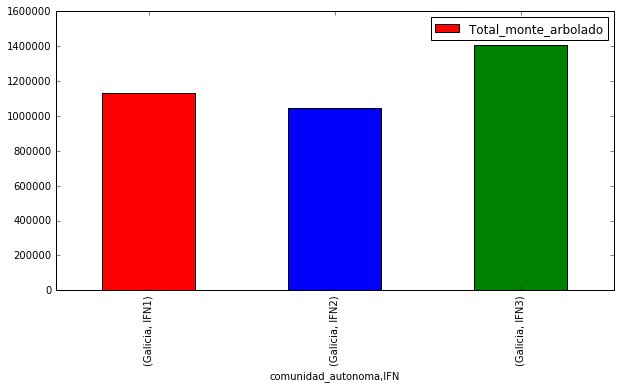

In [40]:
# vemos la evolución del monte arbolado en Galicia

Group_Galicia.Total_monte_arbolado.plot(kind="bar", color=['r','b','g']),figsize(6,6), legend(loc='best')

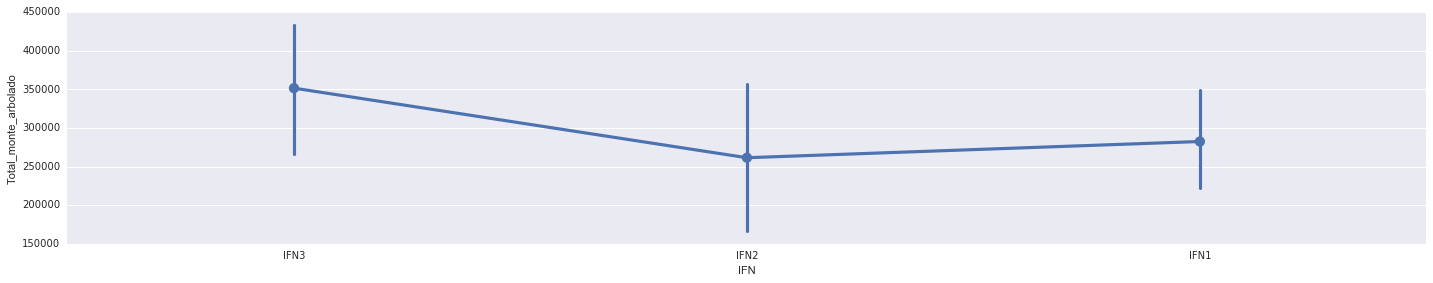

In [41]:
# vemos en un gráfico la evolución

import seaborn as sns 
%matplotlib inline 
sns.factorplot('IFN','Total_monte_arbolado', data=Galicia,size=4,aspect=5)



In [42]:
# De ambos gráficos se deduce que según el inventario forestal nacional cada vezhay más arboles en Galicia 

In [43]:
# Hagamos lo mismo para la siguiente posible etapa de la ardilla: Castilla León

In [44]:
CastillaLeon = IFN123[(IFN123.comunidad_autonoma ==  "CastillaLeon")]

In [45]:
CastillaLeon.head()

,IFN,Provincia,comunidad_autonoma,longitud,Latitud,Ano_inventario,Bosque_no_adehesado,Bosque_adehesado,Monte_arbolado_ralo,Total_monte_arbolado,Monte_desarbolado,Total_uso_forestal,Total_uso_no_forestal,Total_provincial,Biomasa_arborea,Cantidad_pies_mayores,Cantidad_pies_menores,Cantidad_pies_mayoresxHa,Cantidad_pies_menoresxHa,Biomasa_arboreaxHa
63,IFN3,Salamanca,CastillaLeon,40.970104,-5.663540,2002.0,188557.0,320808.0,24019.0,533384.0,262295.0,795679.0,439316.0,1234995.0,11202914.0,92823731.0,115797576.0,174.0,217.0,21.00
64,IFN2,Salamanca,CastillaLeon,40.970104,-5.663540,1992.0,100796.0,192032.0,38060.0,330888.0,321679.0,652567.0,582428.0,1234995.0,6433119.0,65644174.0,90838593.0,198.0,275.0,19.44
65,IFN1,Salamanca,CastillaLeon,40.970104,-5.663540,1965.0,0.0,146292.0,0.0,263848.0,304040.0,567888.0,665712.0,1233600.0,4297836.0,26003013.0,44479351.0,99.0,169.0,16.29
66,IFN3,avila,CastillaLeon,40.656685,-4.681209,2002.0,177870.0,41898.0,19539.0,239307.0,286242.0,525549.0,279466.0,805015.0,12057888.0,67851447.0,64556510.0,284.0,270.0,50.39
67,IFN2,avila,CastillaLeon,40.656685,-4.681209,1991.0,83055.0,46665.0,28411.0,158131.0,320766.0,478897.0,326118.0,805015.0,7389753.0,43944160.0,55580192.0,278.0,351.0,46.73


In [46]:
Group_CastillaLeon = CastillaLeon.groupby(['comunidad_autonoma','IFN']).sum()

In [47]:
CastillaLeon.head()

,IFN,Provincia,comunidad_autonoma,longitud,Latitud,Ano_inventario,Bosque_no_adehesado,Bosque_adehesado,Monte_arbolado_ralo,Total_monte_arbolado,Monte_desarbolado,Total_uso_forestal,Total_uso_no_forestal,Total_provincial,Biomasa_arborea,Cantidad_pies_mayores,Cantidad_pies_menores,Cantidad_pies_mayoresxHa,Cantidad_pies_menoresxHa,Biomasa_arboreaxHa
63,IFN3,Salamanca,CastillaLeon,40.970104,-5.663540,2002.0,188557.0,320808.0,24019.0,533384.0,262295.0,795679.0,439316.0,1234995.0,11202914.0,92823731.0,115797576.0,174.0,217.0,21.00
64,IFN2,Salamanca,CastillaLeon,40.970104,-5.663540,1992.0,100796.0,192032.0,38060.0,330888.0,321679.0,652567.0,582428.0,1234995.0,6433119.0,65644174.0,90838593.0,198.0,275.0,19.44
65,IFN1,Salamanca,CastillaLeon,40.970104,-5.663540,1965.0,0.0,146292.0,0.0,263848.0,304040.0,567888.0,665712.0,1233600.0,4297836.0,26003013.0,44479351.0,99.0,169.0,16.29
66,IFN3,avila,CastillaLeon,40.656685,-4.681209,2002.0,177870.0,41898.0,19539.0,239307.0,286242.0,525549.0,279466.0,805015.0,12057888.0,67851447.0,64556510.0,284.0,270.0,50.39
67,IFN2,avila,CastillaLeon,40.656685,-4.681209,1991.0,83055.0,46665.0,28411.0,158131.0,320766.0,478897.0,326118.0,805015.0,7389753.0,43944160.0,55580192.0,278.0,351.0,46.73


(<matplotlib.axes._subplots.AxesSubplot at 0xefedc88>,
 None,
 <matplotlib.legend.Legend at 0xeef0588>)

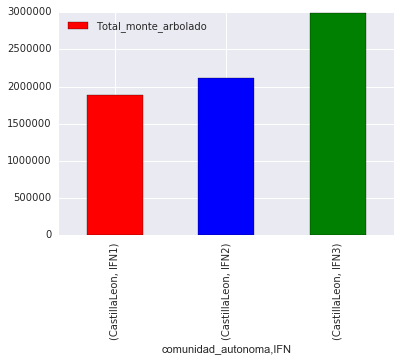

In [48]:
Group_CastillaLeon.Total_monte_arbolado.plot(kind="bar", color=['r','b','g']),figsize(6,6), legend(loc='best')

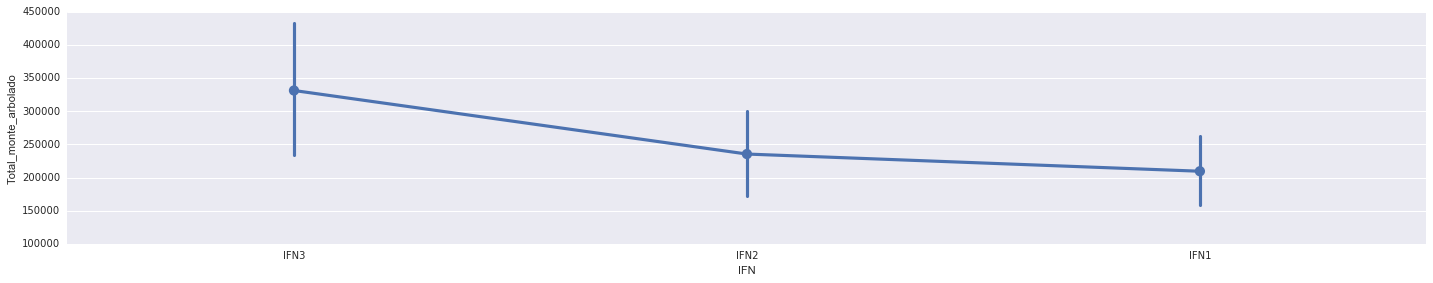

In [49]:
import seaborn as sns 
%matplotlib inline 
sns.factorplot('IFN','Total_monte_arbolado', data=CastillaLeon,size=4,aspect=5)


In [50]:
# De ambos gráficos se deduce que según el inventario forestal nacional hay también cada vez más arboles en Castilla León

In [51]:
# siguiente salto: Castilla la Mancha

In [52]:
CastillaMancha = IFN123[(IFN123.comunidad_autonoma ==  "Castilla La Mancha")]

In [53]:
CastillaMancha .head()

,IFN,Provincia,comunidad_autonoma,longitud,Latitud,Ano_inventario,Bosque_no_adehesado,Bosque_adehesado,Monte_arbolado_ralo,Total_monte_arbolado,Monte_desarbolado,Total_uso_forestal,Total_uso_no_forestal,Total_provincial,Biomasa_arborea,Cantidad_pies_mayores,Cantidad_pies_menores,Cantidad_pies_mayoresxHa,Cantidad_pies_menoresxHa,Biomasa_arboreaxHa
90,IFN3,Guadalajara,Castilla La Mancha,40.643624,-3.171878,2004.0,520920.0,0.0,32813.0,553732.0,210568.0,764300.0,456909.0,1221209.0,20437776.0,231676158.0,459064635.0,418.0,829.0,36.91
91,IFN2,Guadalajara,Castilla La Mancha,40.643624,-3.171878,1992.0,294260.0,0.0,137100.0,431360.0,307929.0,739288.0,482131.0,1221419.0,12254312.0,139306239.0,340936086.0,323.0,790.0,28.41
92,IFN1,Guadalajara,Castilla La Mancha,40.643624,-3.171878,1967.0,0.0,10414.0,0.0,301360.0,408975.0,710335.0,508665.0,1219000.0,9431803.0,60489027.0,148668207.0,201.0,493.0,31.30
93,IFN3,Cuenca,Castilla La Mancha,40.217912,-1.991949,2004.0,666349.0,0.0,34994.0,701344.0,108944.0,810288.0,903824.0,1714112.0,33238759.0,254286550.0,438922254.0,363.0,626.0,47.39
94,IFN2,Cuenca,Castilla La Mancha,40.217912,-1.991949,1992.0,464243.0,0.0,99947.0,564190.0,286150.0,850340.0,863675.0,1714015.0,23005642.0,182831692.0,318068671.0,324.0,564.0,40.78


In [54]:
Group_CastillaMancha = CastillaMancha.groupby(['comunidad_autonoma','IFN']).sum()

In [55]:
Group_CastillaMancha.head()

longitud   Latitud  Ano_inventario  \
comunidad_autonoma IFN                                          
Castilla La Mancha IFN1  198.658469 -15.00776          9834.0   
                   IFN2  198.658469 -15.00776          9963.0   
                   IFN3  198.658469 -15.00776         10020.0   

                         Bosque_no_adehesado  Bosque_adehesado  \
comunidad_autonoma IFN                                           
Castilla La Mancha IFN1                  0.0          181926.0   
                   IFN2            1124195.0          254526.0   
                   IFN3            2238001.0          266803.0   

                         Monte_arbolado_ralo  Total_monte_arbolado  \
comunidad_autonoma IFN                                               
Castilla La Mancha IFN1                  0.0             1439508.0   
                   IFN2             472501.0             1851222.0   
                   IFN3             234793.0             2739597.0   

                         Monte_desarbolado  Total_uso_forestal  \
comunidad_autonoma IFN                                           
Castilla La Mancha IFN1          1841569.0           3281077.0   
                   IFN2          1622315.0           3473536.0   
                   IFN3           825182.0           3564779.0   

                         Total_uso_no_forestal  Total_provincial  \
comunidad_autonoma IFN                                             
Castilla La Mancha IFN1              4641523.0         7922600.0   
                   IFN2              4472649.0         7946185.0   
                   IFN3              4378493.0         7943272.0   

                         Biomasa_arborea  Cantidad_pies_mayores  \
comunidad_autonoma IFN                                            
Castilla La Mancha IFN1       55084300.0            347774974.0   
                   IFN2       49524473.0            500117900.0   
                   IFN3       83734225.0            858701263.0   

                         Cantidad_pies_menores  Cantidad_pies_mayoresxHa  \
comunidad_autonoma IFN                                                     
Castilla La Mancha IFN1           4.563499e+08                    1042.0   
                   IFN2           1.025681e+09                    1258.0   
                   IFN3           1.539020e+09                    1536.0   

                         Cantidad_pies_menoresxHa  Biomasa_arboreaxHa  
comunidad_autonoma IFN                                                 
Castilla La Mancha IFN1                    1496.0              159.92  
                   IFN2                    2640.0              118.00  
                   IFN3                    2751.0              146.23

(<matplotlib.axes._subplots.AxesSubplot at 0xeef0d30>,
 None,
 <matplotlib.legend.Legend at 0x1053f6a0>)

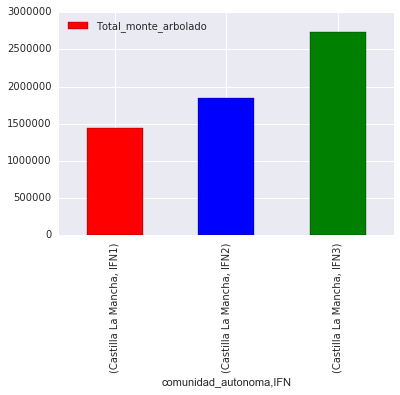

In [56]:
Group_CastillaMancha.Total_monte_arbolado.plot(kind="bar", color=['r','b','g']),figsize(6,6), legend(loc='best')

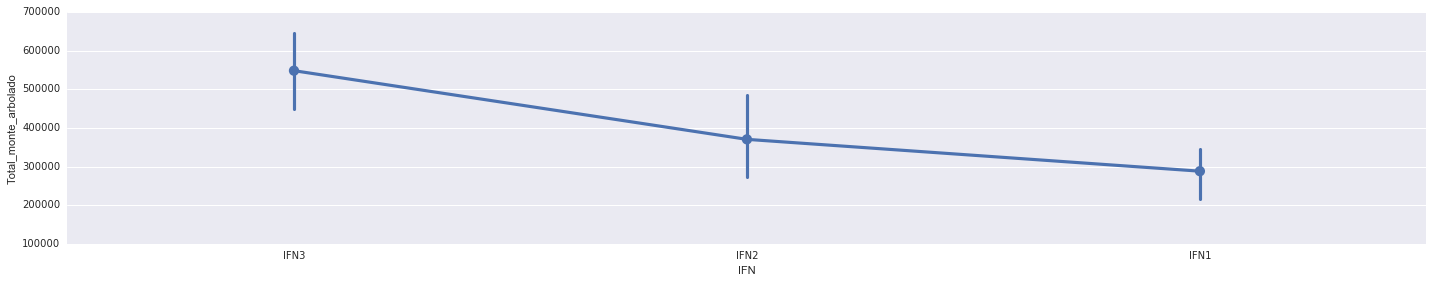

In [57]:
import seaborn as sns 
%matplotlib inline 
sns.factorplot('IFN','Total_monte_arbolado', data=CastillaMancha,size=4,aspect=5)


In [58]:
# De ambos gráficos se deduce que según el inventario forestal nacional hay también cada vez más arboles en Castilla León

In [59]:
# Última etapa: Andalucía

In [60]:
Andalucia = IFN123[(IFN123.comunidad_autonoma ==  "Andalucia")]

In [61]:
Andalucia.head()

,IFN,Provincia,comunidad_autonoma,longitud,Latitud,Ano_inventario,Bosque_no_adehesado,Bosque_adehesado,Monte_arbolado_ralo,Total_monte_arbolado,Monte_desarbolado,Total_uso_forestal,Total_uso_no_forestal,Total_provincial,Biomasa_arborea,Cantidad_pies_mayores,Cantidad_pies_menores,Cantidad_pies_mayoresxHa,Cantidad_pies_menoresxHa,Biomasa_arboreaxHa
132,IFN3,Almeria,Andalucia,36.834047,-2.463714,2007.0,154811.0,0.0,16070.0,170881.0,416770.0,587651.0,289838.0,877489.0,4091716.0,57100159.0,58073211.0,334.0,340.0,23.94
133,IFN2,Almeria,Andalucia,36.834047,-2.463714,1995.0,89991.0,0.0,11858.0,101849.0,459167.0,561016.0,316484.0,877500.0,1659154.0,33442135.0,31637677.0,328.0,311.0,16.29
134,IFN1,Almeria,Andalucia,36.834047,-2.463714,1966.0,0.0,4044.0,0.0,64608.0,460005.0,524613.0,352787.0,877400.0,459488.0,4567660.0,12196272.0,71.0,189.0,7.11
135,IFN3,Cadiz,Andalucia,36.527061,-6.288596,2007.0,189148.0,20092.0,29588.0,238828.0,110738.0,349567.0,394022.0,743588.0,7246985.0,50004714.0,68480484.0,209.0,287.0,30.34
136,IFN2,Cadiz,Andalucia,36.527061,-6.288596,1996.0,111539.0,21602.0,34534.0,167675.0,226946.0,394620.0,349415.0,744036.0,3820255.0,26540337.0,41251311.0,158.0,246.0,22.78


In [62]:
Group_Andalucia = Andalucia.groupby(['comunidad_autonoma','IFN']).sum()

In [63]:
Group_Andalucia.head()

longitud    Latitud  Ano_inventario  \
comunidad_autonoma IFN                                           
Andalucia          IFN1  297.577987 -38.265603         15740.0   
                   IFN2  297.577987 -38.265603         15963.0   
                   IFN3  297.577987 -38.265603         16055.0   

                         Bosque_no_adehesado  Bosque_adehesado  \
comunidad_autonoma IFN                                           
Andalucia          IFN1                  0.0          572890.0   
                   IFN2            1451535.0          681379.0   
                   IFN3            2046436.0          665245.0   

                         Monte_arbolado_ralo  Total_monte_arbolado  \
comunidad_autonoma IFN                                               
Andalucia          IFN1                  0.0             1821913.0   
                   IFN2             278719.0             2411632.0   
                   IFN3             257397.0             2969079.0   

                         Monte_desarbolado  Total_uso_forestal  \
comunidad_autonoma IFN                                           
Andalucia          IFN1          2509271.0           4331184.0   
                   IFN2          1913747.0           4325378.0   
                   IFN3          1422720.0           4391800.0   

                         Total_uso_no_forestal  Total_provincial  \
comunidad_autonoma IFN                                             
Andalucia          IFN1              4395616.0         8726800.0   
                   IFN2              4434589.0         8759969.0   
                   IFN3              4367791.0         8759590.0   

                         Biomasa_arborea  Cantidad_pies_mayores  \
comunidad_autonoma IFN                                            
Andalucia          IFN1       30252243.0            223304349.0   
                   IFN2       40794501.0            402855610.0   
                   IFN3       74970838.0            657441659.0   

                         Cantidad_pies_menores  Cantidad_pies_mayoresxHa  \
comunidad_autonoma IFN                                                     
Andalucia          IFN1            222049148.0                     960.0   
                   IFN2            513480154.0                    1567.0   
                   IFN3            767908378.0                    1878.0   

                         Cantidad_pies_menoresxHa  Biomasa_arboreaxHa  
comunidad_autonoma IFN                                                 
Andalucia          IFN1                    1059.0              133.05  
                   IFN2                    1936.0              154.55  
                   IFN3                    2202.0              207.67

(<matplotlib.axes._subplots.AxesSubplot at 0x10709080>,
 None,
 <matplotlib.legend.Legend at 0x10801c88>)

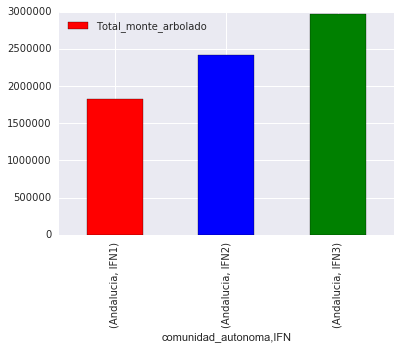

In [64]:
Group_Andalucia.Total_monte_arbolado.plot(kind="bar", color=['r','b','g']),figsize(6,6), legend(loc='best')

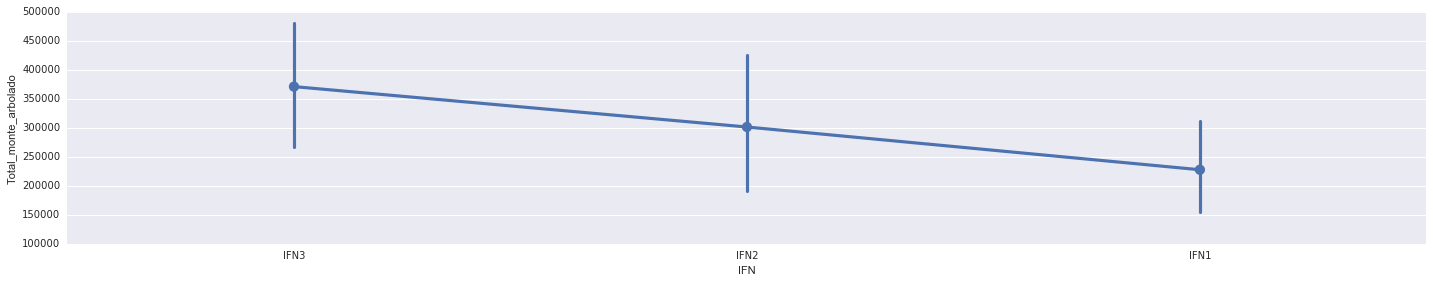

In [65]:
import seaborn as sns 
%matplotlib inline 
sns.factorplot('IFN','Total_monte_arbolado', data=Andalucia,size=4,aspect=5)

In [66]:
# Igualmente el inventario forestal nacional dice que cada vez hay más árboles también en Andalucía

In [ ]:
# podemos comparar en toda España como según va pasando de IFN a IFN como aumenta el monte arbolado: 

In [68]:
import folium
import pandas
#df=pandas.read_csv("Volcanoes_USA.txt")
map=folium.Map(location=[41,-3],zoom_start=6,tiles='Mapbox bright')

map.add_child(folium.GeoJson(data=open('provincias.json'),

name="IFN3",
style_function=lambda x: {'fillColor':'red' if x['properties']['IFN3'] <= 400000 else 'orange' if 600000 < x['properties']['IFN3'] < 1000004 else 'green'}))

map.add_child(folium.GeoJson(data=open('provincias.json'),

name="IFN2",
style_function=lambda x: {'fillColor':'red' if x['properties']['IFN2'] <= 400000 else 'orange' if 600000 < x['properties']['IFN2'] < 1000004 else 'green'}))

map.add_child(folium.GeoJson(data=open('provincias.json'),

name="IFN1",
style_function=lambda x: {'fillColor':'red' if x['properties']['IFN1'] <= 400000 else 'orange' if 600000 < x['properties']['IFN1'] < 1000004 else 'green'}))



map.add_child(folium.LayerControl())
map.save(outfile='map.html')
map

Para comparar datos de monte arbolado en distintos IFN en el mapa pulsar las siguientes opciones

<img src="Comparar.PNG">

Y después elegir IFN

<img src="Comparar1.PNG">

Así podemos ver como por ejemplo Galicia que pasa de las 4 provincias en rojo en el IF1 a 2 en verde (más árboes) en el IFN 3

# Conclusión

<img src="Conclusion.PNG">

## Aunque la situación actual para la ardilla no es la ideal, y no podría ir de árbol en arbol desde La Coruña a Almeria, en el futuro podrá moverse a muchos más sitios sin tocar el suelo ya que la superficie arbolada según el IFN está en claro aumento.

<img src="Thanks.PNG"> 